In [1]:
import sys
sys.path.append('/users/taoshi11/analysator/')
import pytools as pt
import numpy as np
# import imageio

Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using matplotlib version 3.8.4


In [2]:
np.load('../../output/Bflux/Bconvection_rate/azimuthal_convection_rate_all_new.npy').shape

(812, 100)

In [3]:
size_phi = 50
phi = np.linspace(0,2*np.pi,size_phi)
Re = 6371000
r = 20 * Re
x, y = r * np.cos(phi), r * np.sin(phi)
points_circle = np.zeros((size_phi,3))
points_circle[:,0] = x
points_circle[:,1] = y
points_origin = np.zeros((size_phi,3))

In [4]:
# Reconnection rate using flux
Bflux_total = np.loadtxt('../../output/Bflux/Bflux_total.csv', delimiter=',')
convrate_total_az = np.loadtxt('../../output/Bflux/Bconvection_rate/convection_rate_total.csv', delimiter=',')
convrate_total_r = np.loadtxt('../../output/Bflux/B_radial_conv_rate/radial_conv_rate.csv', delimiter=',')
convrate_io = np.loadtxt('../../output/Bflux/io_Bflux/io_open_flux_ns.csv', delimiter=',')

In [5]:
Bflux_total.shape

(812, 9)

In [6]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
from matplotlib import cm

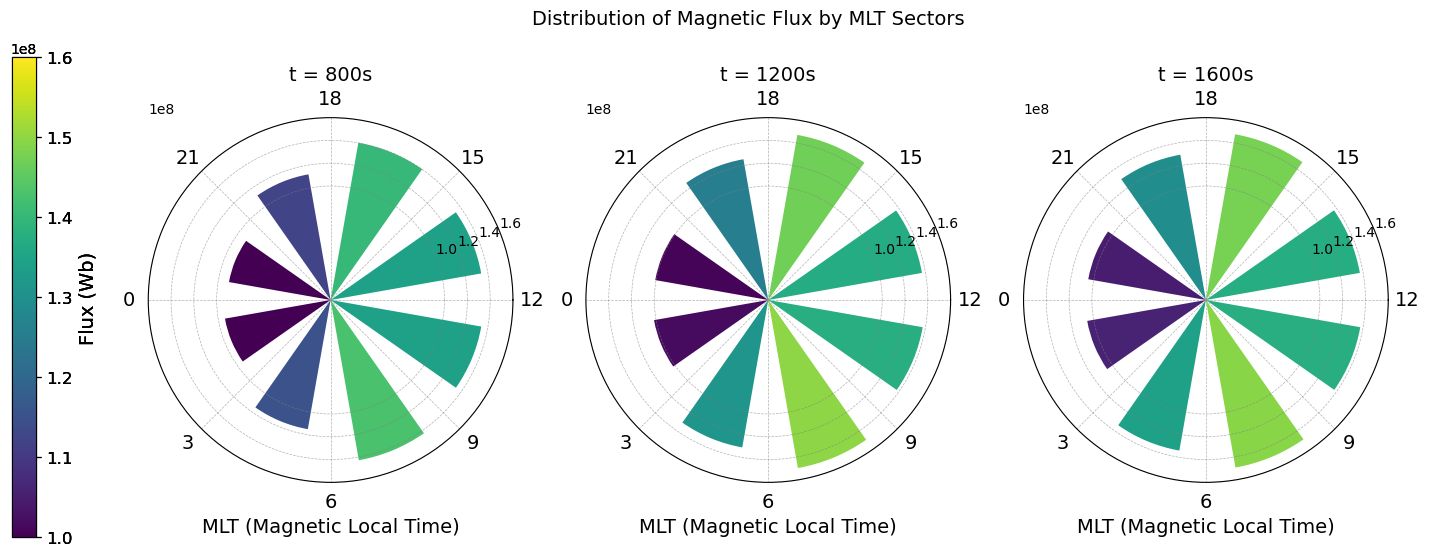

In [7]:
I = Bflux_total[:,0]
# Create a polar plot
fig = plt.figure(figsize=(16, 6))
for j in range(3):
    ax1 = fig.add_subplot(131 + j, polar=True)


    i=[0,400,800]
    
    fluxes_in_sectors = Bflux_total[i[j],1:]
    bin_centers = np.array([1.5, 4.5, 7.5,10.5,13.5,16.5,19.5,22.5])


    # Calculate the width of the bars
    bar_width = np.deg2rad(360/8)

    idx = [4,5,6,7,0,1,2,3]
    fluxes_aranged = fluxes_in_sectors[idx]
    # bin_centers_aranged = bin_centers[idx]

    colormap = cm.viridis
    normalize = plt.Normalize(1e8, 1.6e8)


    ax1.bar(np.deg2rad(bin_centers * 360 / 24), fluxes_aranged, width=np.radians(25), bottom=0.0, align='center',color=colormap(normalize(fluxes_aranged)))

    # Set polar labels
    time_run = int(I[i[j]])
    ax1.set_title(f't = {time_run}s',fontsize = 14)
    ax1.set_xticks(np.deg2rad([180, 225, 270, 315, 0, 45, 90, 135]))
    ax1.set_xticklabels(['0', '3', '6', '9', '12', '15', '18', '21'],fontsize = 14)

    ax1.set_rmax(1.6e8)

    ax1.set_yticks([1.0e8, 1.2e8, 1.4e8, 1.6e8])
    ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

    ax1.set_xlabel('MLT (Magnetic Local Time)',fontsize = 14)

    # plt.title(f'Histogram of Fluxes in Sectors, t={I[i]}s')

    cax = fig.add_axes([0.04, 0.1, 0.015, 0.8])  
    sm = plt.cm.ScalarMappable(cmap=colormap,norm = normalize)
    sm.set_array([])  
    cbar = plt.colorbar(sm, cax=cax)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Flux (Wb)',fontsize = 14)  

    fig.suptitle('Distribution of Magnetic Flux by MLT Sectors',fontsize = 14)


# plt.savefig("../../output/Bflux/B_polar_plots.png")
plt.show()

In [8]:
# plot the total flux varies with time t
total_flux = np.sum(Bflux_total[:,1:],axis = 1)

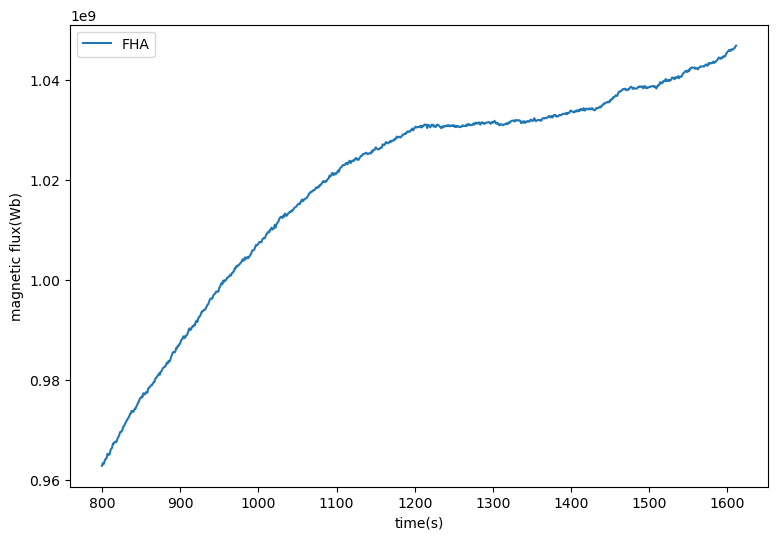

In [9]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors


fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

ax1.plot(Bflux_total[:,0],total_flux,label = 'FHA')
ax1.set_ylabel('magnetic flux(Wb)')
ax1.set_xlabel('time(s)')
plt.legend()
# plt.savefig("../../output/Bflux/B_closedflux_with_t.png")
plt.show()

In [10]:
convrate_total_r.shape

(812, 9)

In [11]:
convrate_total_r[0,:]

array([   800.        , -65962.45723124, -17311.02411034,   2341.8385138 ,
        15237.29230198,   9117.17591956,  -5374.49050974,  -1888.41462738,
       -48212.71945948])

In [12]:
convrate_io = np.loadtxt('../../output/Bflux/io_Bflux/io_open_flux.csv', delimiter=',')

In [13]:
filepath = '/scratch/project_2000203/3D/FHA/bulk1/'
filename = 'bulk1.0001000.vlsv'
name = filepath+filename
f = pt.vlsvfile.VlsvReader(file_name = name)
f.read_variable("vg_connection").shape

Found population proton


(4012332,)

In [14]:
def flux_change_rate(Bflux_total):

    Bflux0 = Bflux_total[:-1,1:]
    Bflux1 = Bflux_total[1:,1:]

    t0 = Bflux_total[:-1,0]
    t1 = Bflux_total[1:,0]
    delta_t = t1-t0

    rate = (Bflux1-Bflux0)/(delta_t[:,np.newaxis])
#     rate = (Bflux1-Bflux0)/(delta_t)
    return rate

In [15]:
rate_Bflux = flux_change_rate(Bflux_total)
rate_io_flux = flux_change_rate(convrate_io)

In [16]:
rate_Bflux.shape

(811, 8)

In [17]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

In [18]:
rate_Bflux.shape

(811, 8)

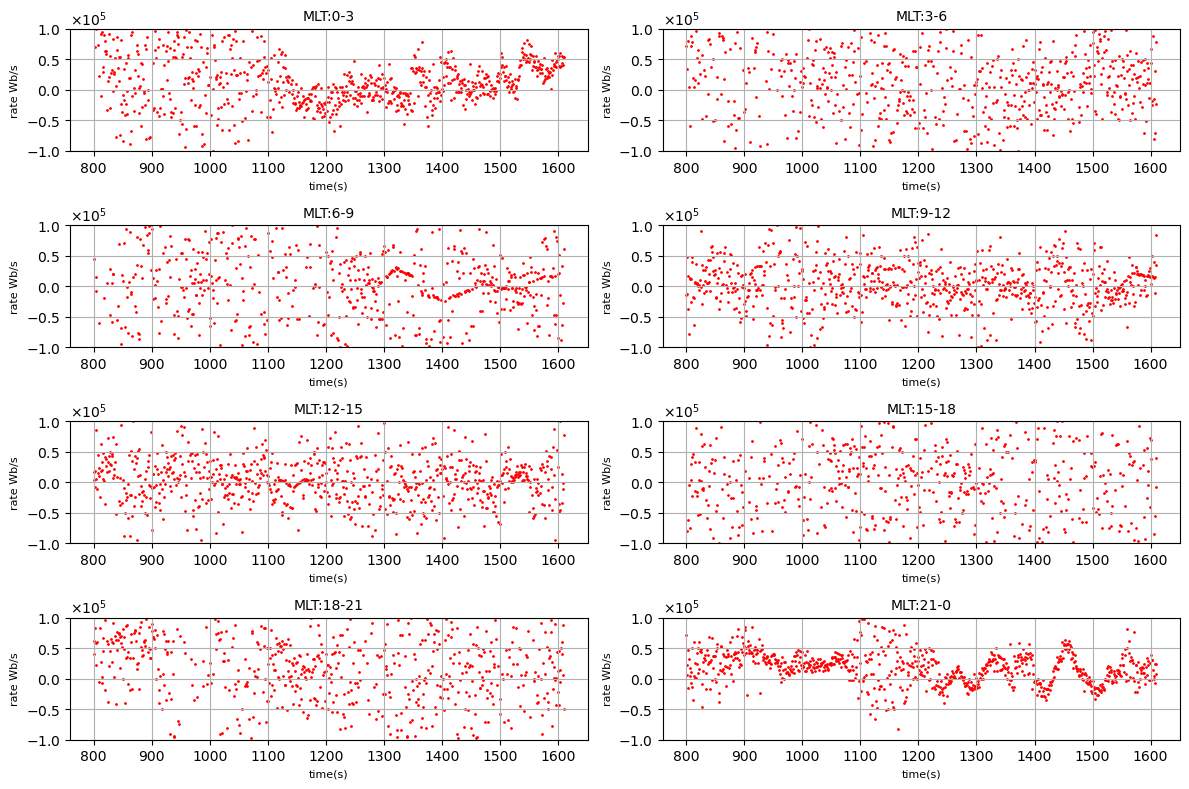

In [19]:
from scipy.ndimage import uniform_filter1d
from matplotlib.ticker import ScalarFormatter
legends = ['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-0']

plt.figure(figsize=(12, 8))
window_size = 10
# for i in range(rate_smoothed.shape[1]):
for i in range(rate_Bflux.shape[1]):
    
#     rate_tmp = rate_smoothed[:,i]
#     rate_tmp = uniform_filter1d(rate_Bflux[:,i], size=window_size)
    rate_tmp = rate_Bflux[:,i]
    t0 = Bflux_total[:-1,0]
#     smoothed = lowess(rate_tmp, t0, frac=0.03)

    ax = plt.subplot(4,2,(i+1))
    plt.scatter(t0,rate_tmp,s = 1,c='r')
#     plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOESS Smoothed')
    plt.xlabel('time(s)',fontsize = 8)
    plt.ylabel('rate Wb/s',fontsize = 8)
    plt.title(f'MLT:{legends[i]}',fontsize = 10)
    plt.ylim([-1e5,1e5])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.grid()

plt.tight_layout()

# plt.savefig("../../output/Bflux/Bflux_change_rate/change_in_MLTsectors")
plt.show()

In [20]:
convrate_total_r.shape

(812, 9)

In [21]:
convrate_dayside_r = convrate_total_r[:,4] + convrate_total_r[:,5]+ convrate_total_r[:,3] + convrate_total_r[:,6]
convrate_nightside_r = convrate_total_r[:,1] + convrate_total_r[:,2] + convrate_total_r[:,7]+ convrate_total_r[:,8]

In [22]:
delta_convrate = np.abs(convrate_dayside_r)-np.abs(convrate_nightside_r)

In [23]:
delta_convrate.shape

(812,)

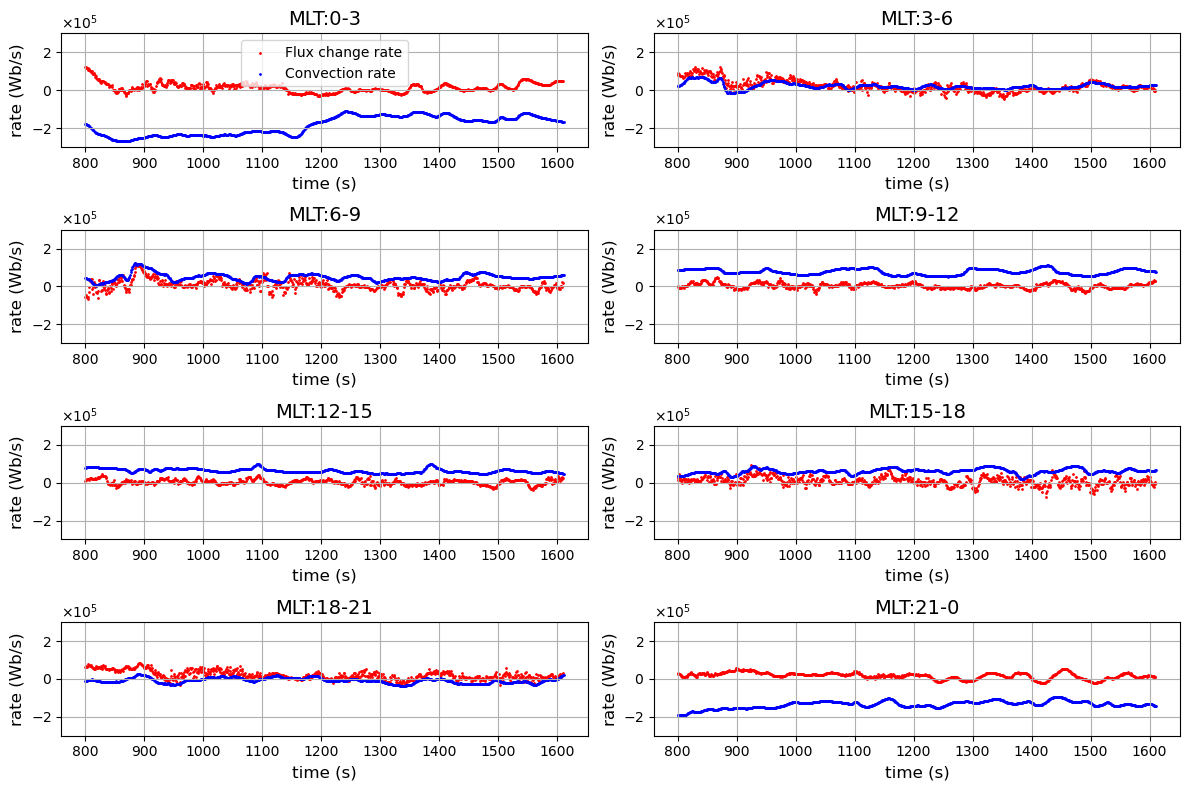

In [24]:
# %matplotlib notebook
plt.figure(figsize=(12, 8))

# convection_rate_total = np.zeros((convrate_total_az.shape[0]-1))
# flux_change_rate_total = np.zeros((rate_Bflux.shape[0]))

reconnection_rate = np.zeros((convrate_total_az.shape[0]-1,8))
reconnection_rate_MLT9_12 = np.zeros((convrate_total_az.shape[0]-1,1))
for i in range(convrate_total_az.shape[1]-1):
    
    convrate_tmp_az = convrate_total_az[:,i+1]
    convrate_tmp_r = convrate_total_r[:,i+1]
    convrate_tmp = convrate_tmp_az+convrate_tmp_r
    
    t1 = Bflux_total[:-1,0]
    t0 = convrate_total_az[:,0]

    convrate_smoothed_tmp = uniform_filter1d(convrate_tmp, size=window_size)
    rate_tmp = uniform_filter1d(rate_Bflux[:,i], size=window_size)
    
#     convrate_smoothed_tmp = convrate_tmp
#     rate_tmp = rate_Bflux[:,i]
    
    reconnection_rate[:,i] = convrate_smoothed_tmp[1:]-rate_tmp
    if i==3:
        reconnection_rate_MLT9_12 = reconnection_rate[:,i]
#     convrate_smoothed_tmp = lowess(convrate_tmp, t0, frac=0.04)
#     convection_rate_total[i] = convrate_smoothed_tmp
#     flux_change_rate_total[i] = rate_tmp
    
    ax = plt.subplot(4,2,(i+1))
    plt.scatter(t1,rate_tmp,s = 1,c='r',label = 'Flux change rate')
    plt.scatter(t0,convrate_smoothed_tmp,s = 1,c='b',label = 'Convection rate')
#     plt.scatter(t1,reconnection_rate[:,i],s=1,c='black',label='Reconnection rate')
#     plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOESS Smoothed')
    plt.xlabel('time (s)',fontsize = 12)
    plt.ylabel('rate (Wb/s)',fontsize = 12)
    plt.title(f'MLT:{legends[i]}',fontsize = 14)
    plt.ylim([-3e5,3e5])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    if i == 0: 
        plt.legend()

    plt.grid()

plt.tight_layout()

# def motion(event):
#     if event.inaxes is not None:
#         txt.set_text('x={:.2f}, y={:.2f}'.format(event.xdata, event.ydata))
#         txt.set_position((event.xdata, event.ydata))
#         fig.canvas.draw()

# Connect the motion_notify_event to the motion function
# fig.canvas.mpl_connect('motion_notify_event', motion)
# plt.legend()
plt.savefig("../../output/Bflux/Bflux_change_rate/Bflux_change_rate_vs_convection_rate.png")
# plt.savefig("../../output/Bflux/Bflux_change_rate/reconnection_rate_sector.png")
plt.show()

In [25]:
np.save("reconnection_rate_MLT9_12.npy",reconnection_rate_MLT9_12)

In [26]:
reconnection_rate.shape
np.save("reconnection_rate_MLTs.npy",reconnection_rate)

In [27]:
Bflux_total = np.loadtxt('../../output/Bflux/Bflux_total.csv', delimiter=',')
Bflux_5Re = np.load('/scratch/project_2000203/taoshi/io_refine/flux_5Re_800_1611_vg.npy')

In [28]:
Bflux_5Re.shape


(811,)

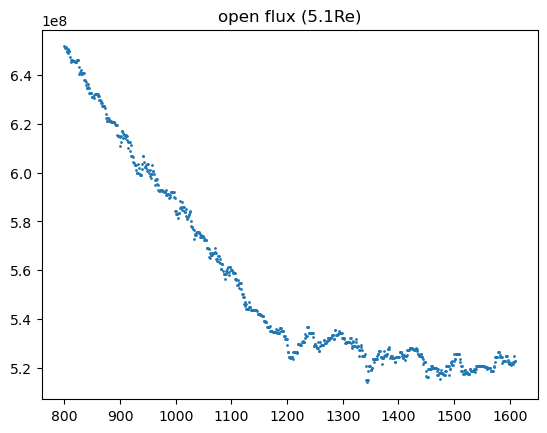

In [29]:
t3 = np.arange(800,1611,1)
plt.scatter(t3,Bflux_5Re,s = 1)
plt.title("open flux (5.1Re)")
plt.show()

In [30]:
# Rate of closed flux (5.1Re)
m4,b4 = np.polyfit(t3[:200],Bflux_5Re[:200],1)
m4/1e3

-326.79221529704097

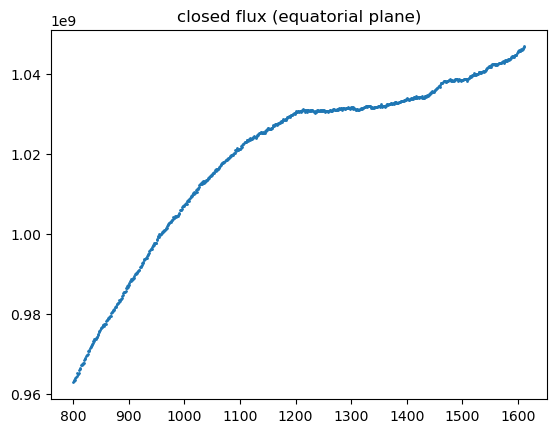

In [31]:

Bflux_entireregion = np.sum(Bflux_total[:,1:],axis=1)
t0 = Bflux_total[:,0]
plt.scatter(t0,Bflux_entireregion,s = 1)
# plt.scatter(t0[1:],Bflux_5Re,s = 1)
# plt.yscale('log')
plt.title("closed flux (equatorial plane)")
plt.show()

In [32]:
m0,b0 = np.polyfit(t0[:200],Bflux_entireregion[:200],1)
m0/1e3

221.29986379578096

In [33]:
Bflux_entireregion[400:].shape

(412,)

In [34]:
m1,b1 = np.polyfit(t0[400:],Bflux_entireregion[400:],1)

In [35]:
m1/1e3

37.73783520510584

In [36]:
# dayside and nightside reconnection
dayside_reconnection = reconnection_rate[:,3]+reconnection_rate[:,4] + reconnection_rate[:,2] +reconnection_rate[:,5]
nightside_reconnection = reconnection_rate[:,0]+reconnection_rate[:,1] + reconnection_rate[:,6] +reconnection_rate[:,7]
delta_daynight = np.abs(dayside_reconnection)-np.abs(nightside_reconnection)
delta_daynight = dayside_reconnection+ nightside_reconnection
delta_daynight.shape
rate_io_flux.shape

(811, 1)

In [37]:
reconnection_rate.shape

(811, 8)

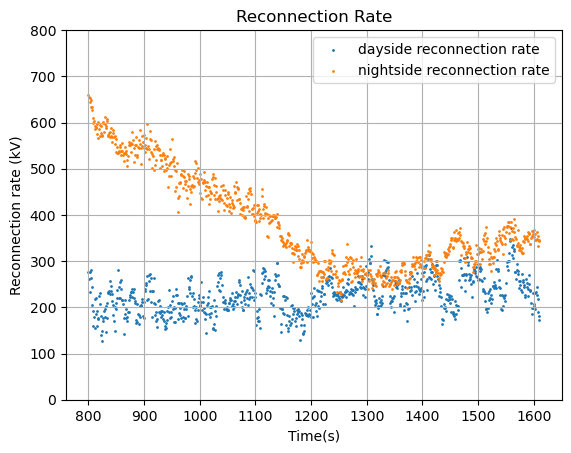

In [38]:
plt.title("Reconnection Rate")
plt.scatter(t1,dayside_reconnection/1e3,s = 1,label = 'dayside reconnection rate')
plt.scatter(t1, np.abs(nightside_reconnection)/1e3, s = 1, label = 'nightside reconnection rate')
plt.legend()
plt.xlabel('Time(s)')
plt.ylim([0,800])
plt.ylabel('Reconnection rate (kV)')
plt.grid()
plt.savefig("../../output/dayside_nightside_reconnection.png")

plt.show()

In [39]:
from scipy.signal import find_peaks
peaks,_ = find_peaks(dayside_reconnection)


In [40]:
dayside_reconnection[400:500]/1e3

array([231.23748111, 221.01028263, 207.19535499, 179.43693567,
       222.89068472, 224.82086095, 240.98688454, 205.82696556,
       193.12001174, 209.38510873, 181.40793925, 237.18022504,
       203.23228262, 234.53682652, 198.30261311, 234.7241146 ,
       214.44424759, 224.95937724, 232.60908564, 247.03615843,
       241.59035022, 206.88538217, 265.65816272, 227.94287513,
       229.39620795, 207.63241633, 252.06772628, 259.96194931,
       260.82244917, 255.7171166 , 265.72387106, 248.82250518,
       258.72595293, 267.55346038, 285.56294685, 266.6079106 ,
       252.50710368, 263.94664948, 243.3935189 , 225.29983214,
       231.82109301, 233.89057364, 227.22038751, 228.97384055,
       218.83696768, 225.93613407, 226.67305167, 215.03433489,
       224.11489979, 231.59183194, 220.45784591, 232.95871145,
       215.06043612, 225.02999231, 213.35381776, 228.53605295,
       222.36581062, 225.47585755, 244.67235743, 227.01769486,
       234.17630534, 232.39534739, 237.63067872, 223.25

In [41]:
np.where(t1==1300)[0]

array([500])

In [42]:
t1[435]

1235.0

In [43]:
dayside_reconnection.shape

(811,)

In [44]:
reconnection_rate.shape

(811, 8)

In [45]:
rate_io = flux_change_rate(convrate_io)
rate_io.shape

(811, 1)

In [46]:
a_without = np.load("/scratch/project_2000203/taoshi/io_refine/flux_without_refine_990_1000.npy")

In [47]:
a = [46936119.299505085,46929501.4941913,46862613.03067254,46817196.35724115,46828119.65968575,46827543.49289001,46774077.18381575,46721160.829494916,46745197.78908562,46718840.7028488]

In [123]:
a_without1 = np.load("/scratch/project_2000203/taoshi/io_refine/flux_without_refine_800_1611.npy")

In [49]:
flux_vg = np.load("/scratch/project_2000203/taoshi/io_refine/flux_5Re_800_1611_vg.npy")

In [124]:
a_without1

array([-6.46015123e+08, -6.45903473e+08, -6.45263329e+08, -6.45850487e+08,
       -6.44789929e+08, -6.44064471e+08, -6.44255202e+08, -6.45056895e+08,
       -6.43777667e+08, -6.43398781e+08, -6.42355830e+08, -6.40796105e+08,
       -6.39677153e+08, -6.39077639e+08, -6.40561405e+08, -6.40302431e+08,
       -6.39359067e+08, -6.39671914e+08, -6.39157442e+08, -6.38596993e+08,
       -6.38051621e+08, -6.38059072e+08, -6.37391207e+08, -6.37761477e+08,
       -6.37261465e+08, -6.37020434e+08, -6.36343453e+08, -6.36401009e+08,
       -6.34953231e+08, -6.35319269e+08, -6.35435135e+08, -6.34092986e+08,
       -6.33635460e+08, -6.33429666e+08, -6.32872434e+08, -6.33034689e+08,
       -6.32875703e+08, -6.32527755e+08, -6.31953440e+08, -6.31478599e+08,
       -6.31369329e+08, -6.30613957e+08, -6.30700872e+08, -6.30491597e+08,
       -6.29983232e+08, -6.29817110e+08, -6.29226150e+08, -6.28629006e+08,
       -6.28745775e+08, -6.28532619e+08, -6.29020965e+08, -6.28081682e+08,
       -6.27767216e+08, -

In [51]:
t = np.arange(800,1611,1)

In [52]:
convrate_io.shape

(812, 2)

In [53]:
t_test = np.arange(990,1000)
t_test

array([990, 991, 992, 993, 994, 995, 996, 997, 998, 999])

In [54]:
rate_io.shape

(811, 1)

In [55]:
delta_daynight.shape
delta_convrate.shape

(812,)

In [56]:
a_without1[np.where(a_without1 == 0)[0]] = np.nan

In [57]:

delta_flux_vg = np.diff(flux_vg)

In [58]:
delta_flux_vg.shape


(810,)

In [59]:
c = [1206689134.32938,1206554883.3916233,1204853272.7299743,1203731224.7037404,1204068397.4681568,1204125308.52683,1202815795.9478414,1201469472.6561577,1202094634.9542344,1201405606.590247]
len(c)

10

In [60]:
(np.array(c)/2-np.abs(a_without1[190:200]))/1e7

array([1.18607912, 1.14160576, 1.28546104, 1.30274299, 1.27449895,
       1.32336842, 1.2789082 , 1.19531689, 1.16949833, 1.25429813])

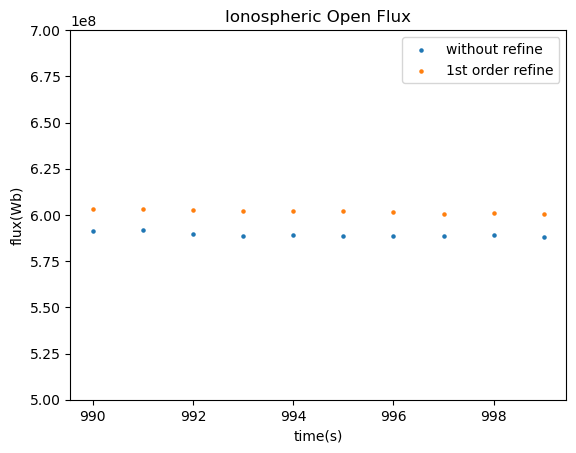

In [61]:
plt.scatter(t[190:200],np.abs(a_without1[190:200]), s = 5,label = 'without refine')
plt.scatter(t[190:200],np.array(c)/2, s = 5,label = '1st order refine')
plt.title("Ionospheric Open Flux")
plt.ylim([5e8,7e8])
plt.xlabel('time(s)')
plt.ylabel('flux(Wb)')
plt.legend()

plt.savefig("../../output/io_refine_compare.png")
plt.show()

In [125]:
a_without1

array([-6.46015123e+08, -6.45903473e+08, -6.45263329e+08, -6.45850487e+08,
       -6.44789929e+08, -6.44064471e+08, -6.44255202e+08, -6.45056895e+08,
       -6.43777667e+08, -6.43398781e+08, -6.42355830e+08, -6.40796105e+08,
       -6.39677153e+08, -6.39077639e+08, -6.40561405e+08, -6.40302431e+08,
       -6.39359067e+08, -6.39671914e+08, -6.39157442e+08, -6.38596993e+08,
       -6.38051621e+08, -6.38059072e+08, -6.37391207e+08, -6.37761477e+08,
       -6.37261465e+08, -6.37020434e+08, -6.36343453e+08, -6.36401009e+08,
       -6.34953231e+08, -6.35319269e+08, -6.35435135e+08, -6.34092986e+08,
       -6.33635460e+08, -6.33429666e+08, -6.32872434e+08, -6.33034689e+08,
       -6.32875703e+08, -6.32527755e+08, -6.31953440e+08, -6.31478599e+08,
       -6.31369329e+08, -6.30613957e+08, -6.30700872e+08, -6.30491597e+08,
       -6.29983232e+08, -6.29817110e+08, -6.29226150e+08, -6.28629006e+08,
       -6.28745775e+08, -6.28532619e+08, -6.29020965e+08, -6.28081682e+08,
       -6.27767216e+08, -

In [63]:
m5,b5 = np.polyfit(t[:200],a_without1[:200],1)
m5/1e3

280.1435583034323

In [64]:
a_without1[199]

-588159821.9712914

In [65]:
np.where(np.isnan(a_without1))[0]

array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255])

In [66]:
flux_vg_smoothed = uniform_filter1d(flux_vg, size=20)

In [126]:
# a_without1_smoothed1 = uniform_filter1d(a_without1[0:200],size = 20)
# a_without1_smoothed2 = uniform_filter1d(a_without1[256:], size = 20)

a_without1_smoothed1 = uniform_filter1d(a_without1, size = 20)

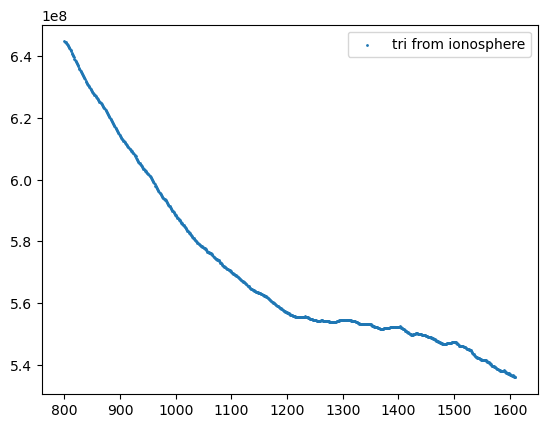

In [127]:

# plt.scatter(t,flux_vg_smoothed, s = 1,label = 'vg')
plt.scatter(t,np.abs(a_without1_smoothed1), s= 1,label = 'tri from ionosphere')
# plt.scatter(t[256:],np.abs(a_without1_smoothed2), s= 1,label = 'tri from ionosphere')
plt.legend()
plt.show()
m,b = np.polyfit(t[:400],flux_vg[:400],1)

In [128]:
a_without1_smoothed1

array([-6.44837536e+08, -6.44785388e+08, -6.44636310e+08, -6.44367323e+08,
       -6.44108445e+08, -6.43933292e+08, -6.43708917e+08, -6.43384346e+08,
       -6.43104775e+08, -6.42767473e+08, -6.42396567e+08, -6.41998392e+08,
       -6.41606172e+08, -6.41212566e+08, -6.40808115e+08, -6.40431692e+08,
       -6.40079490e+08, -6.39683903e+08, -6.39251108e+08, -6.38809886e+08,
       -6.38405911e+08, -6.38059876e+08, -6.37724720e+08, -6.37422636e+08,
       -6.37140237e+08, -6.36755788e+08, -6.36392401e+08, -6.36068233e+08,
       -6.35711025e+08, -6.35350825e+08, -6.34994905e+08, -6.34660791e+08,
       -6.34288535e+08, -6.33954018e+08, -6.33590524e+08, -6.33226613e+08,
       -6.32866446e+08, -6.32510581e+08, -6.32121981e+08, -6.31811608e+08,
       -6.31472276e+08, -6.31151567e+08, -6.30851002e+08, -6.30557590e+08,
       -6.30264337e+08, -6.29965904e+08, -6.29636899e+08, -6.29331407e+08,
       -6.29020884e+08, -6.28765712e+08, -6.28520379e+08, -6.28251634e+08,
       -6.28016246e+08, -

In [70]:
b = [1267275221.0866373, 1267096540.3431652, 1265290551.8281586, 1264064301.645511, 1264359230.8115153, 1264343674.3080304, 1262900083.963025, 1261471342.3963628, 1262120340.3053114,1261408698.9769175]

In [71]:
np.diff(a)/1000

array([ -6.61780531, -66.88846352, -45.41667343,  10.92330244,
        -0.5761668 , -53.46630907, -52.91635432,  24.03695959,
       -26.35708624])

In [72]:
np.diff(b)/1000

array([ -178.68074347, -1805.98851501, -1226.25018265,   294.929166  ,
         -15.55650348, -1443.59034501, -1428.74156666,   648.99790895,
        -711.64132839])

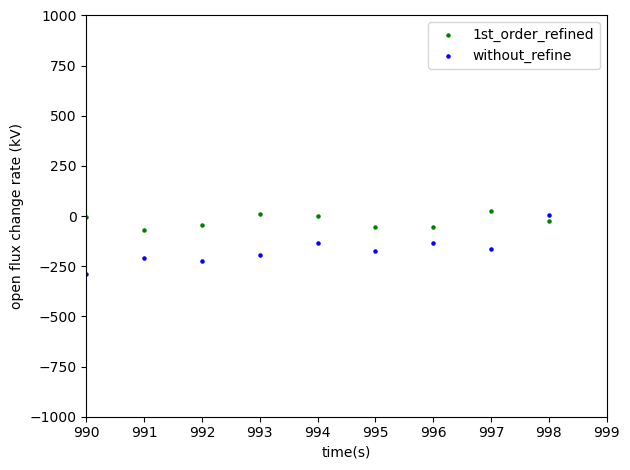

In [73]:
fig = plt.figure()
ax2 = fig.add_subplot(111)

# ax1.set_title("Reconnection Rate")
# ax1.scatter(t1,dayside_reconnection/1e3,s = 1,label = r'dayside reconnection rate $\Phi_D$')
# ax1.scatter(t1, nightside_reconnection/1e3, s = 1, label = r'nightside reconnection rate $\Phi_N$')
# ax1.legend()
# ax1.set_xlabel('time(s)')
# ax1.set_ylim([-600,600])
# ax1.set_ylabel('kV')


# ax2.scatter(convrate_io[207:,0],rate_io_filtered[6:]/1000,c='b',s=2,label='io_dF/dt')
# ax2.scatter(convrate_io[:-1,0],rate_io/1000,c='b',s=5,label='io_dF/dt')
# ax2.scatter(convrate_io[:-1,0],delta_daynight/1000,c='r',s=1,label=r'$|\Phi_D|-|\Phi_N|$')

# ax2.scatter(convrate_io[:-1,0],delta_convrate[1:]/1000,c='g',s=1,label='convrate_r')

ax2.scatter(t_test[:-1],np.diff(a)/1000,c = 'g',s = 5,label = '1st_order_refined')
# ax2.scatter(t_test[:-1], np.diff(a_without)/1000, c = 'b',s = 5,label = 'without_refine')

# ax2.scatter(t[:-1], np.diff(a_without1)/1000, c = 'b',s = 1,label = r'$\frac{dF_o}{dt}$')
ax2.scatter(t[:199], np.diff(np.abs(a_without1_smoothed1))/1000, c = 'b',s = 5,label = "without_refine")
ax2.scatter(t[256:-1], np.diff(np.abs(a_without1_smoothed2))/1000, c = 'b',s = 5)

# ax2.scatter(t[:-1], delta_flux_vg/1000, c = 'g',s = 1,label = r'$\frac{dF_o}{dt}$ from vg')
ax2.set_xlim([990,999])
# ax2.set_ylim([-1e7,1e7])

ax2.set_ylim([-1e3,1e3])

# ax2.set_yscale('symlog')
# ax2.set_yscale('log')
ax2.set_xlabel("time(s)")
ax2.set_ylabel("open flux change rate (kV)")
# ax2.set_xlim([800,1600])
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2.legend()
plt.tight_layout()
plt.show()

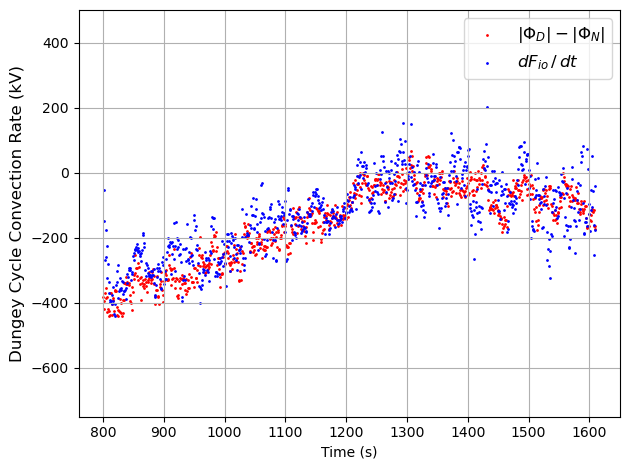

In [129]:
window_size = 10

convrate_io_filtered = uniform_filter1d(convrate_io[200:,1], size=window_size)
rate_io_filtered = np.diff(convrate_io_filtered)

# rate_io_new = flux_change_rate(convrate_io[200:])
# rate_io_filtered = uniform_filter1d(rate_io_new, size=window_size)

fig = plt.figure()
ax2 = fig.add_subplot(111)

# ax1.set_title("Reconnection Rate")
# ax1.scatter(t1,dayside_reconnection/1e3,s = 1,label = r'dayside reconnection rate $\Phi_D$')
# ax1.scatter(t1, nightside_reconnection/1e3, s = 1, label = r'nightside reconnection rate $\Phi_N$')
# ax1.legend()
# ax1.set_xlabel('time(s)')
# ax1.set_ylim([-600,600])
# ax1.set_ylabel('kV')


# ax2.scatter(convrate_io[207:,0],rate_io_filtered[6:]/1000,c='b',s=2,label='io_dF/dt')
# ax2.scatter(convrate_io[:-1,0],rate_io/1000,c='b',s=5,label='io_dF/dt')
ax2.scatter(convrate_io[:-1,0],delta_daynight/1000,c='r',s=1,label=r'$|\Phi_D|-|\Phi_N|$')

# ax2.scatter(convrate_io[:-1,0],delta_convrate[1:]/1000,c='g',s=1,label='convrate_r')

# ax2.scatter(t_test[:-1],np.diff(a)/1000,c = 'g',s = 5,label = 'refined')
# ax2.scatter(t_test[:-1], np.diff(a_without)/1000, c = 'b',s = 5,label = 'without_refine')

# ax2.scatter(t[:-1], np.diff(a_without1)/1000, c = 'b',s = 1,label = r'$\frac{dF_o}{dt}$')

# ax2.scatter(t[:199], np.diff(np.abs(a_without1_smoothed1))/1000, c = 'b',s = 1,label = r'$dF_{io}\, / \,dt$')
# ax2.scatter(t[256:-1], np.diff(np.abs(a_without1_smoothed2))/1000, c = 'b',s = 1)
ax2.scatter(t[1:], np.diff(np.abs(a_without1_smoothed1))/1000, c = 'b',s = 1,label = r'$dF_{io}\, / \,dt$')

# ax2.scatter(t[:-1], delta_flux_vg/1000, c = 'g',s = 1,label = r'$\frac{dF_o}{dt}$ from vg')
# ax2.set_xlim([990,999])
# ax2.set_ylim([-1e7,1e7])

ax2.set_ylim([-750,500])

# ax2.set_yscale('symlog')
# ax2.set_yscale('log')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Dungey Cycle Convection Rate (kV)",fontsize = 12)
# ax2.set_xlim([800,1600])
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax2.legend(fontsize = 12)
plt.grid()
plt.tight_layout()

plt.savefig("../../output/mag_io_rate.png")
plt.show()

In [76]:
np.diff(a)/1000

array([ -6.61780531, -66.88846352, -45.41667343,  10.92330244,
        -0.5761668 , -53.46630907, -52.91635432,  24.03695959,
       -26.35708624])

In [77]:
rate_io_new = flux_change_rate(convrate_io[200:])
rate_io_new

array([[ 4.91518582e+08],
       [-2.26283880e+05],
       [ 1.23267473e+05],
       [-1.13387538e+05],
       [ 1.43758011e+05],
       [-5.33250602e+05],
       [-1.00428116e+06],
       [-8.42646490e+05],
       [-1.15139111e+06],
       [-1.40472814e+05],
       [-2.59078107e+06],
       [ 8.81199346e+05],
       [-8.72443859e+05],
       [ 7.58364007e+05],
       [-4.18749395e+05],
       [-1.24146284e+06],
       [ 2.18140839e+06],
       [-1.97366089e+06],
       [-1.52243577e+06],
       [ 8.17189718e+03],
       [ 7.12629091e+04],
       [-9.56360699e+05],
       [ 1.80681502e+06],
       [-1.38498925e+06],
       [ 5.26702535e+03],
       [ 2.42026791e+05],
       [-9.44143458e+05],
       [ 4.87659384e+03],
       [ 4.15905084e+05],
       [-2.70258065e+05],
       [-1.97329124e+06],
       [-4.92216274e+05],
       [ 3.43182039e+04],
       [-1.11167411e+06],
       [ 1.06896784e+06],
       [-2.49136164e+05],
       [ 4.94882178e+03],
       [-1.28691810e+06],
       [-2.6

In [78]:
convrate_io[201:,0].shape
# rate_io_filtered.shape
# rate_io_filtered.shape

(611,)

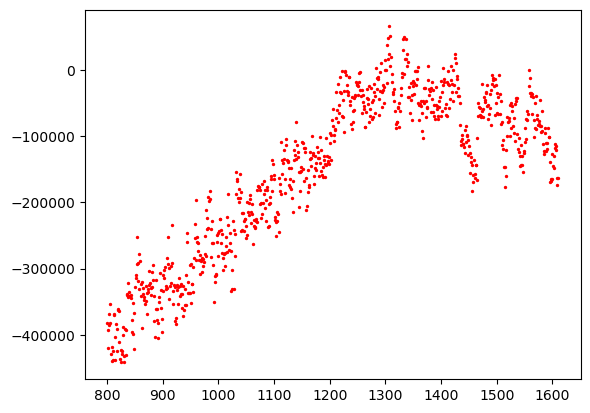

In [79]:
plt.scatter(convrate_io[:-1,0],delta_daynight,c='r',s=2)
plt.show()

In [80]:
rate_io_flux
rate_io_filtered = uniform_filter1d(rate_io_flux, size=window_size)
if rate_io_flux.all()==rate_io_filtered.all():
    print(0)

0


In [81]:
convrate_io_filtered = uniform_filter1d(convrate_io[200:,1], size=window_size)
convrate_io_filtered.shape


(612,)

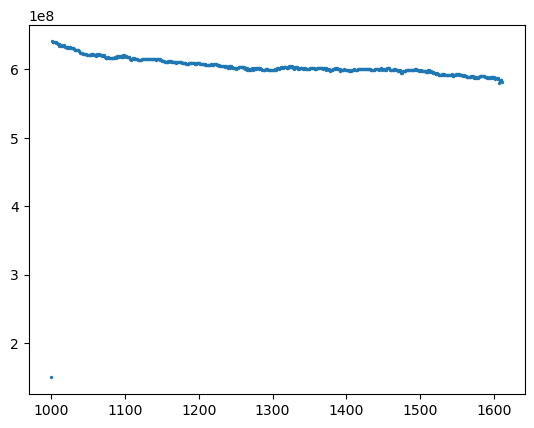

In [82]:
plt.scatter(convrate_io[200:,0],convrate_io[200:,1],s=2)
plt.show()

In [83]:
convrate_io[200:]
np.diff(convrate_io_filtered[200:])

array([ 5.53199320e+04,  6.82666533e+04, -1.05617251e+05, -1.65333135e+05,
       -2.80528766e+05, -2.66466515e+05, -2.45439569e+05, -2.09298668e+05,
       -2.09277165e+05, -2.35108335e+05, -2.35388118e+05, -1.67494160e+05,
       -1.47516083e+04,  4.22443338e+04,  8.91489894e+04,  8.88100304e+04,
        1.23320829e+05,  1.36564007e+05,  1.36323279e+05,  1.50019582e+05,
        7.50365654e+04,  6.81853411e+03, -6.83231692e+04, -2.23410414e+05,
       -2.09663391e+05, -2.54625219e+05, -2.15129791e+05, -2.15189116e+05,
       -2.92409608e+05, -2.92408919e+05, -2.04356777e+05, -3.32928686e+05,
       -2.44672477e+05, -2.28816929e+05, -2.57326942e+05, -1.60167585e+05,
       -1.23447080e+05, -1.23235897e+05, -2.76464812e+05, -2.49679929e+03,
       -1.54763229e+05, -1.09236890e+05, -1.97247795e+05, -1.47505834e+05,
        2.60529900e+04, -1.65365513e+05, -2.16188100e+05, -2.16417584e+05,
        6.48997938e+04, -1.44743102e+05, -5.91469582e+03,  1.13022766e+05,
        1.00703558e+05,  

In [84]:
convrate_io[200,0]

1000.0

In [85]:
reconnection_rate[:,4].mean() # MLT 12-15

59280.16615024941

In [86]:
reconnection_rate[:,2].mean() # MLT 6-9

41206.06756870626

In [87]:
reconnection_rate[:,5].mean() # MLT 15-18

51900.21655283452

In [88]:
dayside_reconnection_rate_mean = reconnection_rate[:,3].mean()+reconnection_rate[:,4].mean() + reconnection_rate[:,2].mean() +reconnection_rate[:,5].mean()
Leff_mean = dayside_reconnection_rate_mean/(5e-9*7.5e5)
print(dayside_reconnection_rate_mean/1000)
print(Leff_mean/6371000)

226.24135041717392
9.469632204977717


In [89]:
Re = 6371000
Leff_mean/Re

9.469632204977717

In [90]:
dayside_reconnection_rate = reconnection_rate[:,3]+reconnection_rate[:,4] + reconnection_rate[:,2]+reconnection_rate[:,5]
Leff = dayside_reconnection_rate/(5e-9*7.5e5)

In [91]:
t1.shape

(811,)

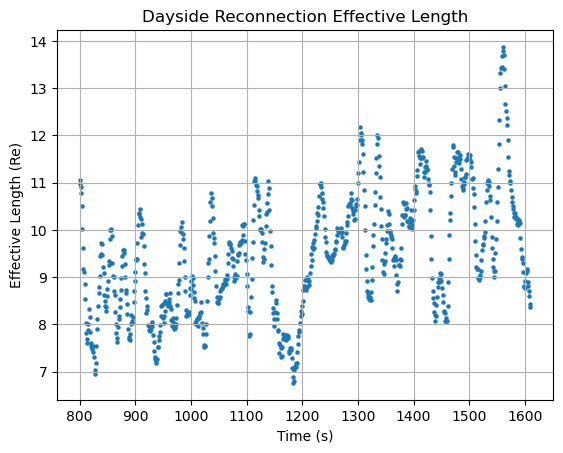

In [92]:
Leff_smoothed = uniform_filter1d(Leff, size=window_size)
plt.scatter(t1,Leff_smoothed/Re,s = 5)
plt.title("Dayside Reconnection Effective Length")
plt.xlabel("Time (s)")
plt.ylabel("Effective Length (Re)")
plt.grid()
plt.savefig("../../output/dayside_reconnection_eff_l.png")
plt.show()

In [93]:
tail_reconnection_rate_mean = reconnection_rate[:,0].mean()+reconnection_rate[:,1].mean() + reconnection_rate[:,6].mean() +reconnection_rate[:,7].mean()
tail_reconnection_rate_mean/1000

-384.0082053813716

In [94]:
tail_reconnection_rate = reconnection_rate[:,0]+reconnection_rate[:,1] + reconnection_rate[:,6] +reconnection_rate[:,7]
tail_reconnection_rate.shape

(811,)

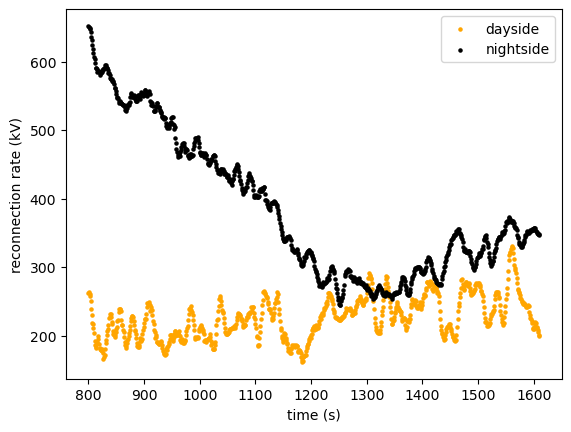

In [95]:
day_rec_smoothed = uniform_filter1d(dayside_reconnection_rate, size=window_size)
tail_rec_smoothed = uniform_filter1d(tail_reconnection_rate, size=window_size)

plt.scatter(t1,day_rec_smoothed/1000,c = 'orange',s = 5,label = 'dayside')
plt.scatter(t1,np.abs(tail_rec_smoothed)/1000,c = 'black',s = 5,label = 'nightside')
plt.legend()
plt.ylabel('reconnection rate (kV)')
plt.xlabel('time (s)')
plt.show()

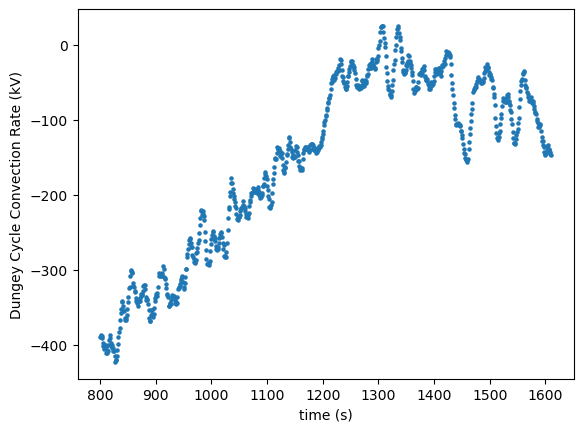

In [96]:
# Dungey cycle convection rate
plt.scatter(t1,day_rec_smoothed/1000-np.abs(tail_rec_smoothed)/1000,s = 5)
plt.ylabel('Dungey Cycle Convection Rate (kV)')
plt.xlabel('time (s)')
plt.show()

In [97]:
a = reconnection_rate[:,0].mean()

In [98]:
reconnection_rate[:,1].mean()

-1242.9086347026807

In [99]:
reconnection_rate[:,6].mean()

-29526.371228081443

In [100]:
d = reconnection_rate[:,7].mean()

In [101]:
(a+d)/1000

-353.23892551858745

In [102]:
print(dayside_reconnection_rate_mean/1000)
print(np.abs(tail_reconnection_rate_mean/1000))

226.24135041717392
384.0082053813716


In [103]:
(np.abs(tail_reconnection_rate_mean)-dayside_reconnection_rate_mean)*600

94660112.9785186

In [104]:
b = 380e3 * 5e-9
100e3/b/Re

8.261117398739353

In [105]:
7.5e5/380000

1.9736842105263157

In [106]:
# hw0403
q = 1.60217653e-19
B = 5e-9
me = 9.1093826e-31
# The electron gyrofrequncy is (rad/s)
q*B/me/(2*np.pi)/1000

0.13996245720062322

In [107]:
1e6* 8.671e-8

0.08671

In [108]:
kb = 1.3806505e-23
electronTemperature = 0.08671 # keV
np.sqrt(2.0*kb * electronTemperature / me)

1621.2388290420963